<h5><Strong>Goals and a business objective</strong></h5>
<h6><Strong> To develop an application to predict the income of an individual, based on the factors used in developing marketing profiles on people.Data provided by the United States Census Bureau was used. The focus was kept on $50,000 as the key number for salary.</strong></h6>

<h5><strong>Assumptions</strong></h5>	
<h6><strong><p>Assumptions were made about conversion of original data, final weights, similar demographic characteristics should have similar weights. It was assumed that the salary was binary and categorical. Salary greater than $50,000 was replaced with '1' and salary less than $50,000 was replaced with '0' for analysis.</p></strong></h6>


<h5><strong>Import libraries, Load data and clean data</strong></h5>

In [140]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import os
import sys
%matplotlib inline

In [2]:
# Load data 
adult_df=pd.read_csv('adult.data',header=None)
adult_df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation', 'relationship','race', 'sex', 'capital-gain', 'capital-loss','hours-per-week','native-country','salary']
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Clean the dataset by dropping rows with ?
clean_df = adult_df.replace(' ?', np.NaN).dropna()
clean_df.shape

(30162, 15)

In [4]:
# Find the number of people with salary >50K and <50K in the dataset
salary_count = clean_df.groupby('salary').size()
salary_count

salary
 <=50K    22654
 >50K      7508
dtype: int64

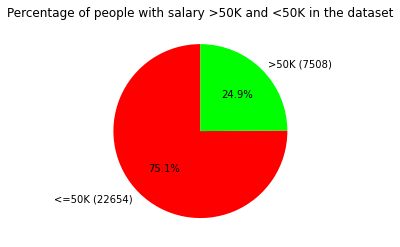

In [5]:
# Pie chart of the number of people with salary >50K and <50K
plt.pie(salary_count, labels=['<=50K (22654)', '>50K (7508)'], autopct='%1.1f%%', startangle=90, colors=['#ff0000', '#00ff00'])
plt.title('Percentage of people with salary >50K and <50K in the dataset')
plt.show()

<h5><strong> Analyze the data to see which attributes or factors contribute to a higher individual salary, and help create various marketing profiles using this analysis.</strong></h5>

In [6]:
# Assume that the salary is binary and categorical variable and convert it to numeric by replacing >50K with 1 and <=50K with 0
log_df = clean_df.copy()
log_df.loc[clean_df.salary.str.strip() == "<=50K", 'salary'] = 0
log_df.loc[clean_df.salary.str.strip() == ">50K", 'salary'] = 1
log_df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


<h5><strong>Salary vs Age analysis</strong></h5>

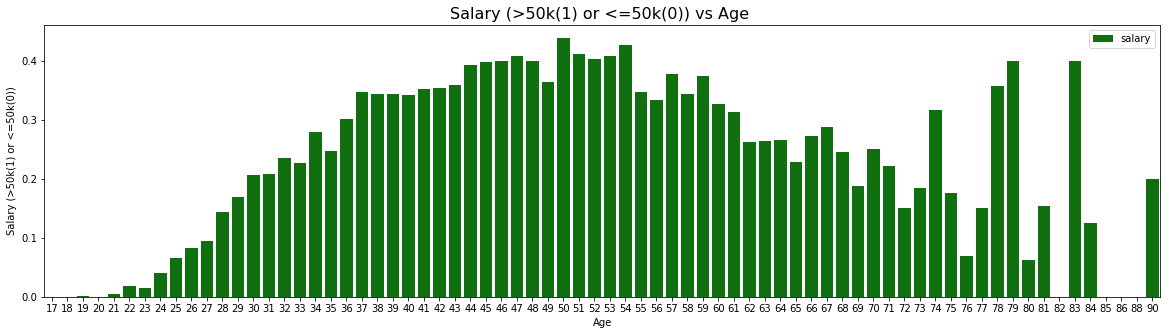

In [109]:
# Plot showing relation between salary and age
fig = plt.figure(figsize=(20,5))
ax_age = sns.barplot(x='age', y='salary', data=log_df, color='green', label='salary', ci=None)
ax_age.set_title("Salary (>50k(1) or <=50k(0)) vs Age ", loc='center', fontsize=16)
ax_age.set_xlabel("Age")
ax_age.set_ylabel("Salary (>50k(1) or <=50k(0))")
ax_age.legend(loc="upper right")

<h6><strong>Conclusion: There is a significant correlation or influence of age on salary earned.</strong></h6>

<h5><strong>Salary vs fnlwgt</strong></h5>

In [112]:
# Relation between salary and fnlwgt below and above 50K
below50_df = log_df[log_df.salary == 0]
above50_df = log_df[log_df.salary == 1]
sumweightbelow = below50_df['fnlwgt'].sum()
sumweightabove = above50_df['fnlwgt'].sum()
print("Percentage weight below 50k: ", (sumweightbelow/(sumweightbelow + sumweightabove))*100)
print("Percentage weight above 50k: ", (sumweightabove/(sumweightbelow + sumweightabove))*100)

Percentage weight below 50k:  75.32335207448135
Percentage weight above 50k:  24.676647925518644


<h6><strong>Conclusion: As it is showing the distribution of the dataset, we can ignore this as an influencing factor.</strong></h6>

<h5><strong>Salary vs Education</strong></h5>

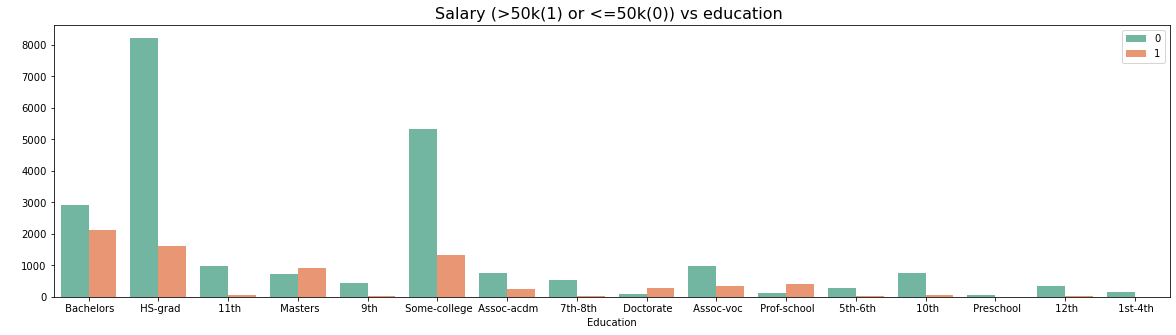

In [9]:
# Plot showing relation between salary and education
fig = plt.figure(figsize=(20,5))
ax_edu = sns.countplot(data=log_df, x='education', hue='salary', palette='Set2')
ax_edu.set_title("Salary (>50k(1) or <=50k(0)) vs education ", loc='center', fontsize=16)
ax_edu.set_xlabel("Education")
ax_edu.set_ylabel(" ")
ax_edu.legend(loc="upper right")

<h6><strong>Conclusion: We see that education does influence the earning power and hence can be considered a factor. </strong></h6>

<h5><strong>Salary vs Education-num </strong></h5>

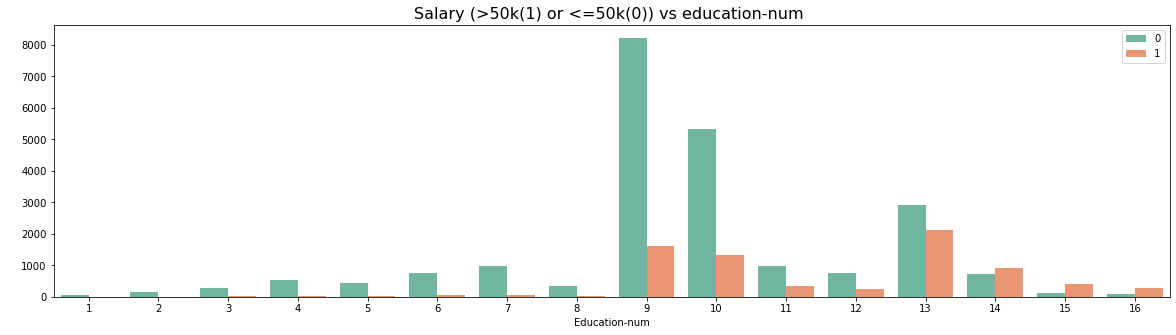

In [10]:
# Plot showing correlation between salary and education-num
fig = plt.figure(figsize=(20,5))
ax_edu_num = sns.countplot(data=log_df, x='education-num', hue='salary', palette='Set2')
ax_edu_num.set_title("Salary (>50k(1) or <=50k(0)) vs education-num ", loc='center', fontsize=16)
ax_edu_num.set_xlabel("Education-num")
ax_edu_num.set_ylabel(" ")
ax_edu_num.legend(loc="upper right")

<h6><strong>Conclusion: This is same as education and can be considered for the model. </strong></h6>

<h5><strong>Salary vs Marital status</strong></h5>

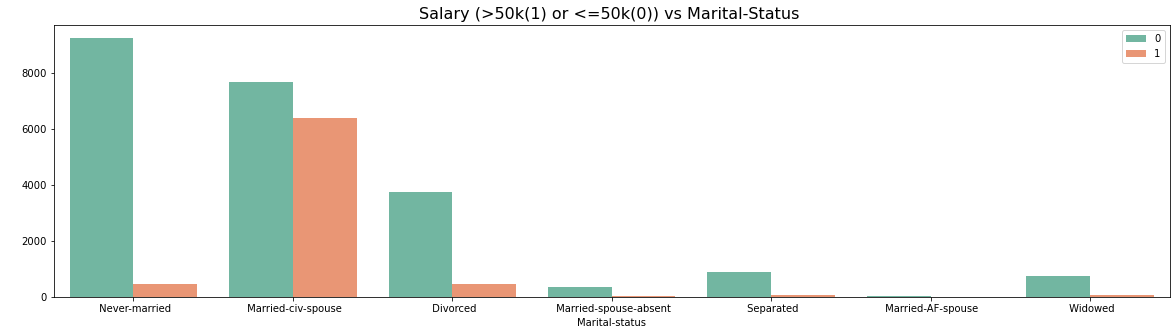

In [11]:
# Plot showing relation between salary and matrial-status matplotlib
fig = plt.figure(figsize=(20,5))
ax_mat = sns.countplot(data=log_df, x='marital-status', hue='salary', palette='Set2')
ax_mat.set_title("Salary (>50k(1) or <=50k(0)) vs Marital-Status ", loc='center', fontsize=16)
ax_mat.set_xlabel("Marital-status")
ax_mat.set_ylabel(" ")
ax_mat.legend(loc="upper right")

<h6><strong>Conclusion: Again we see a strong influence on salary. </strong></h6>

<h5><strong>Salary vs Occupation </strong></h5>

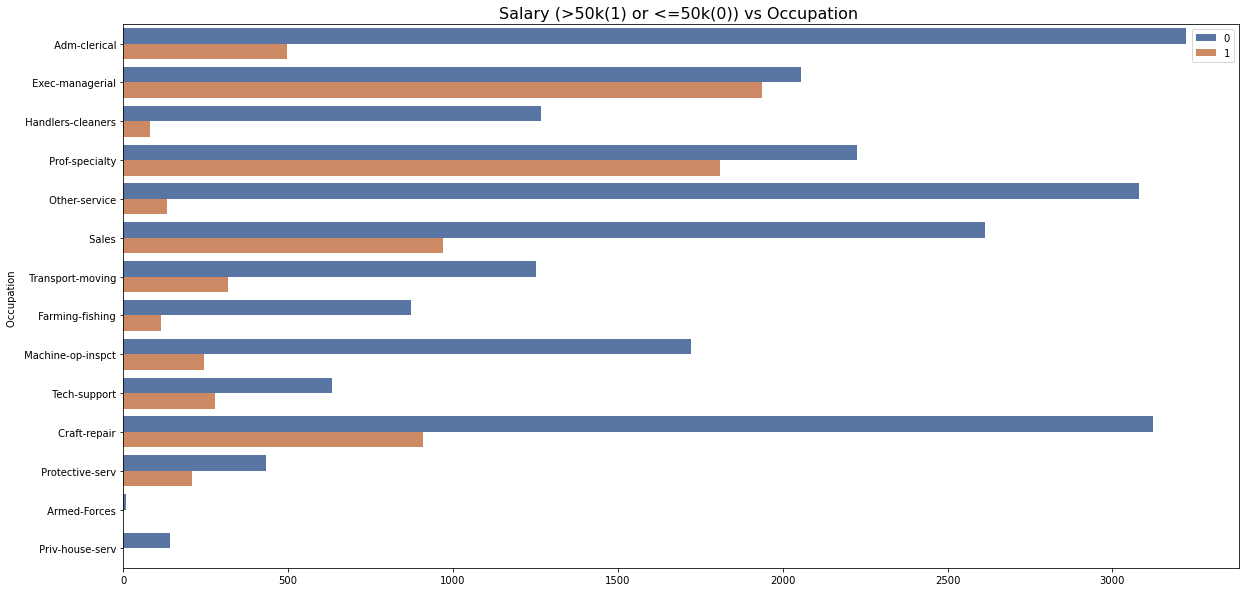

In [12]:
# Plot showing relation between salary and occupation
fig = plt.figure(figsize=(20,10))
ax_occ = sns.countplot(data=log_df, y='occupation', hue='salary', palette='deep',)
ax_occ.set_title("Salary (>50k(1) or <=50k(0)) vs Occupation ", loc='center', fontsize=16)
ax_occ.set_xlabel("")
ax_occ.set_ylabel("Occupation ")
ax_occ.legend(loc="upper right")

<h6><strong>Conclusion: We can conclude that occupations strongly influence salary earned. </strong></h6>

<h5><strong>Salary vs Relationship </strong></h5>

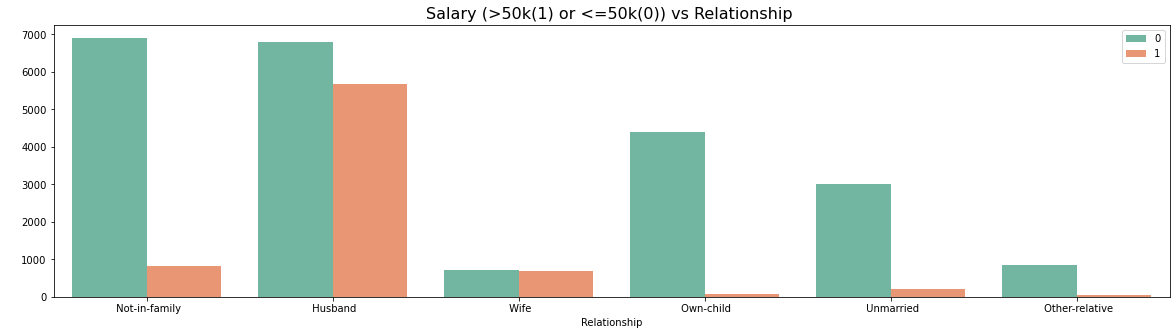

In [13]:
# Plot showing relation between salary and relationship
fig = plt.figure(figsize=(20,5))
ax_rel = sns.countplot(data=log_df, x='relationship', hue='salary', palette='Set2')
ax_rel.set_title("Salary (>50k(1) or <=50k(0)) vs Relationship ", loc='center', fontsize=16)
ax_rel.set_xlabel("Relationship")
ax_rel.set_ylabel(" ")
ax_rel.legend(loc="upper right")

<h6><strong>Conclusion: We can clearly see that relationships have impact on salaries. </strong></h6>

<h5><strong>Salary vs Race </strong></h5>

Text(0.5, 1.0, 'Salary Range based on Race')

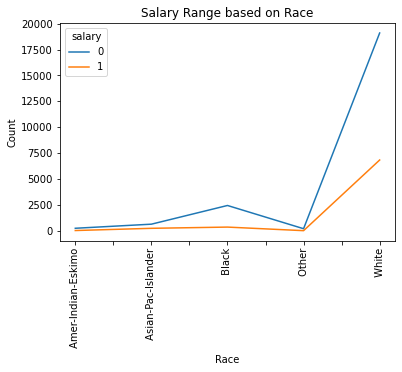

In [26]:
# Plot showing relation between salary and race
#Race Analysis: This appears to have greater impact on the salary
pd.crosstab(log_df['race'], log_df['salary']).plot(kind='line', rot=90)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Salary Range based on Race')

<h6><strong>Conclusion: We can see that it has an impact only if you are white. We can ignore this. </strong></h6>

<h5><strong>Salary vs Sex</strong></h5>

In [15]:
# Plot showing correlation between salary and sex
#Compute the percentage of male and female earning below 50k.
male_df = log_df[log_df['sex'] == ' Male']
male_lessthan50k_df = log_df[(log_df['sex'] == ' Male') & (log_df['salary'] == 0)]
female_df = log_df[log_df['sex'] == ' Female']
female_lessthan50k_df = log_df[(log_df['sex'] == ' Female') & (log_df['salary'] == 0)]
print("Male & Female Percentage with salary <=50k: ", round((male_lessthan50k_df.shape[0]/male_df.shape[0])*100,2), ", ", round((female_lessthan50k_df.shape[0]/female_df.shape[0])*100,2))
male_df = log_df[log_df['sex'] == ' Male']
male_morethan50k_df = log_df[(log_df['sex'] == ' Male') & (log_df['salary'] == 1)]
female_df = log_df[log_df['sex'] == ' Female']
female_morethan50k_df = log_df[(log_df['sex'] == ' Female') & (log_df['salary'] == 1)]
print("Male & Female Percentage with salary >50k: ", round((male_morethan50k_df.shape[0]/male_df.shape[0])*100,2), ", ", round((female_morethan50k_df.shape[0]/female_df.shape[0])*100,2))


Male & Female Percentage with salary <=50k:  68.62 ,  88.63
Male & Female Percentage with salary >50k:  31.38 ,  11.37


Text(0.5, 1.0, 'Salary Range based on Sex')

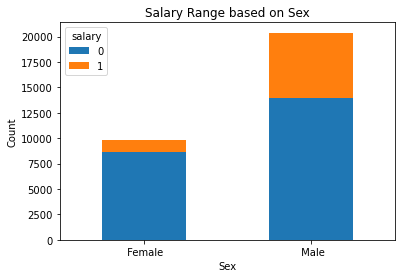

In [23]:
#Sex Analysis: It can be seen that sex has an important role in determining the salary, especially in males.
pd.crosstab(log_df['sex'], log_df['salary']).plot(kind='bar', rot=0, stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Salary Range based on Sex') 

<h6><strong>Conclusion: We can see that sex definitely defines your earning power.</strong></h6>

<h5><strong>Salary vs Native country</strong></h5>

Text(0.5, 1.0, 'Salary Range based on Native Country')

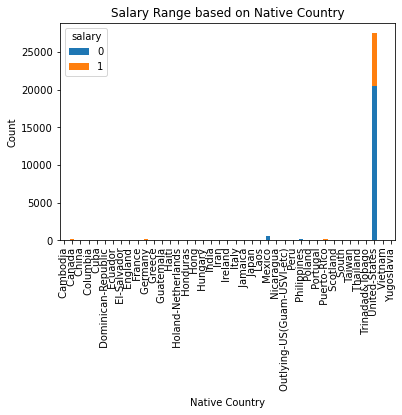

In [24]:
# Plot showing rrelation between salary and native country
#Native Country Analysis: This doesn't appear to have a clear info of the impact on the salary.
pd.crosstab(log_df['native-country'], log_df['salary']).plot(kind='bar', stacked=True)
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Salary Range based on Native Country')

<h6><strong>Conclusion: The influence is limited to United states and can be ignored.</strong></h6>

<h5><strong>Salary vs Capital gain </strong></h5>

Text(0.5, 1.0, 'Salary vs Capital Gain')

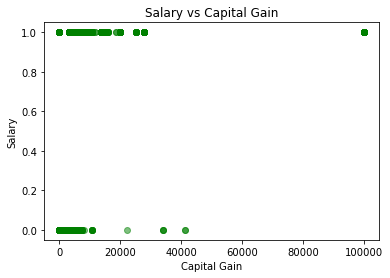

In [115]:
# Plot showing correlation between salary and capital-gain
#Capital Gain Analysis: This doesn't appear to have a clear info of the impact on the salary.
plt.scatter(log_df['capital-gain'], log_df['salary'], alpha=0.5, c='green')
plt.xlabel('Capital Gain')
plt.ylabel('Salary')
plt.title('Salary vs Capital Gain')


<h5><strong>Salary vs Capital loss</strong></h5>

Text(0.5, 1.0, 'Salary vs Capital Loss')

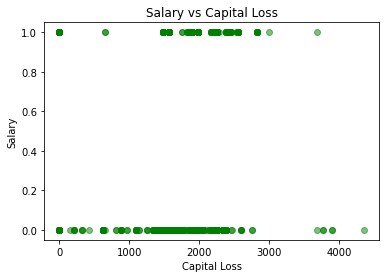

In [33]:
# Plot showing correlation between salary and capital-loss
plt.scatter(log_df['capital-loss'], log_df['salary'], alpha=0.5, c='green')
plt.xlabel('Capital Loss')
plt.ylabel('Salary')
plt.title('Salary vs Capital Loss')

<h6><strong>Conclusion:Both Capital gain and capital loss have a weak relationship with salary and can be ignored. </strong></h6>

<h5><strong>Salary vs Hours per week </strong></h5>

Text(0.5, 1.0, 'Salary Range based on Hours-per-week')

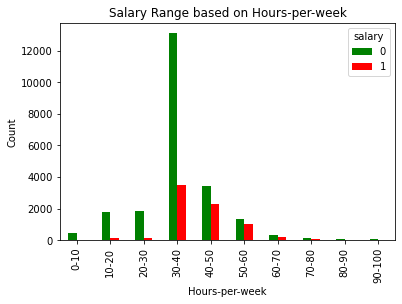

In [77]:
# pie Plot showing correlation between salary and hours-per-week
#Hours-per-week Analysis: This doesn't appear to have a clear info of the impact on the salary.
log_df['hours-per-week-grouped'] = pd.cut(log_df['hours-per-week'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
pd.crosstab(log_df['hours-per-week-grouped'], log_df['salary']).plot(kind='bar',color= ['green','red'])
plt.xlabel('Hours-per-week')
plt.ylabel('Count')
plt.title('Salary Range based on Hours-per-week')

<h6><strong>Conclusion: This can be considered a factor influencing salary.</strong></h6>

<h6><strong>Looking at the analysis so far, we can pick age, education, marital status, occupation, sex and hours per week as factors which influence the salary for our model. </strong></h6>

<h5><strong>Correlation between all the other factors.</strong></h5>

<AxesSubplot:>

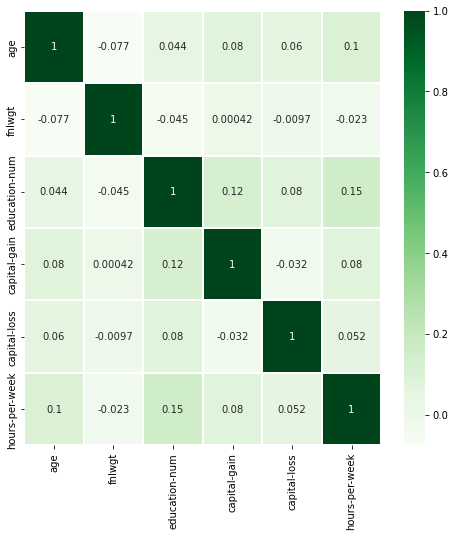

In [17]:
# relation between salary and age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
fig = plt.figure(figsize=(8,8))
sns.heatmap(log_df.corr(), annot=True, cmap= 'Greens', linewidths=0.2)

<Figure size 1440x360 with 0 Axes>

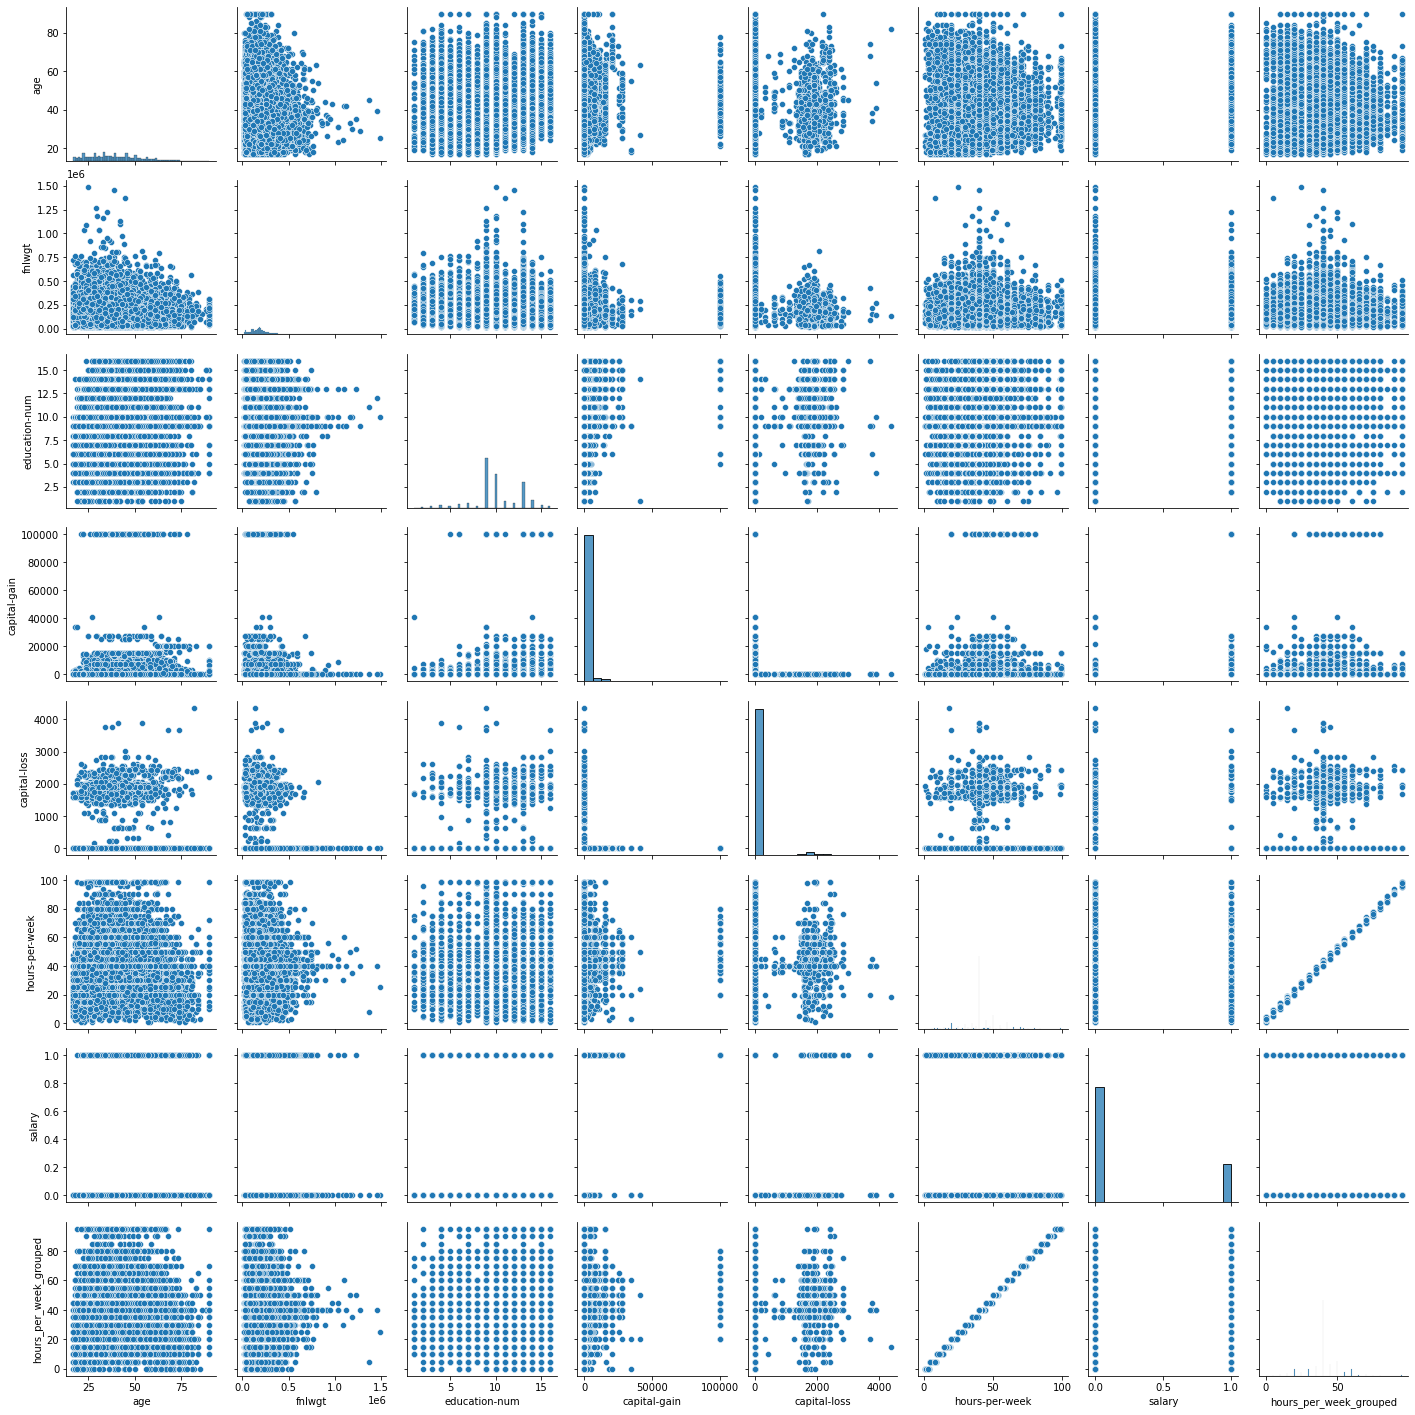

In [99]:
fig = plt.figure(figsize=(20,5))
ax_age = sns.pairplot(log_df)

<h6><strong>Conclusion: From the above heat map and pairplot, we can conclude that there is a further strong correlation between age, education, hours per week and are good factors for the model.</strong></h6>

<h5><strong>Now that the influencing factors are determined to build marketing profiles, a logistic regression model can be built on the training dataset, and the salary category (<=50k and >50k) can be predicted. Model accuracy can also be determined utilizing the confusion matrix. </strong></h5>

<h5><strong>Based on the above analysis, we can consider the following attributes/factors of the dataset are used for building the model. </strong></h5>

In [151]:
cols = ['age', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'hours-per-week','race']

In [153]:
X = log_df[cols]
X_dummies = pd.get_dummies(X)
y = log_df['salary']

# Split the dataset into train and test datasets, considering 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=0)

# Scale the train and test datasets
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=200)
y1 = y_train.astype(int)
logreg.fit(X_train_minmax, y1)

# Predicting the Test set results
y_pred=logreg.predict(X_test_minmax)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

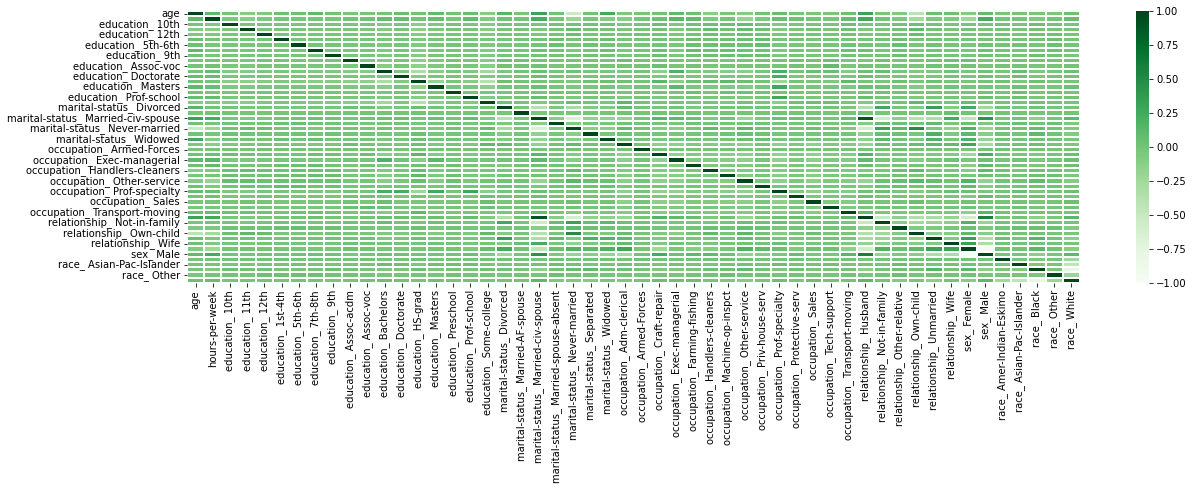

In [154]:
X_dummies = pd.get_dummies(X)
# heatmap
fig = plt.figure(figsize=(20,5))
ax_age = sns.heatmap(X_dummies.corr(), cmap= 'Greens', linewidths=0.2)

<h5><strong>Salary predicted based on the selected factors</strong></h5>

In [155]:
pred_df = X_test.copy()
pred_df['salary'] = pd.Series(y_test, index=pred_df.index)
pred_df['predicted salary'] = pd.Series(y_pred, index=pred_df.index)
pred_df['predicted salary'] = pred_df['predicted salary'].map({0: '<=50k', 1: '>50k'})
pred_df[['salary','predicted salary']]

,salary,predicted salary
2135,0,<=50k
15639,0,<=50k
29059,0,<=50k
27523,0,<=50k
9280,0,<=50k
...,...,...
16826,0,<=50k
25246,0,<=50k
18980,1,<=50k
953,0,<=50k


<h5><strong>Checking for the accuracy of the model </strong></h5>

In [156]:
y1_test = y_test.astype(int)
cnf_matrix = metrics.confusion_matrix(y1_test, y_pred)
cnf_matrix

array([[6199,  565],
       [1003, 1282]], dtype=int64)

Text(0.5, 257.44, 'Predicted Salary')

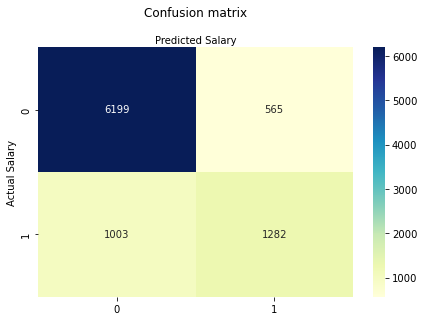

In [157]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Salary')
plt.xlabel('Predicted Salary')

In [158]:
print("Accuracy:", round(metrics.accuracy_score(y1_test, y_pred)*100, 2))
print("Precision:",round(metrics.precision_score(y1_test, y_pred)*100, 2))

Accuracy: 82.67
Precision: 69.41


<h6><strong>Conclusion: We can see that based on the factors selected the model predicts the salary with an 82.67% accuracy and 69.41% precision. </strong></h6>